# SuperStore Analytics

In [3]:
import pandas as pd

# Load Data

In [4]:
df = pd.read_csv("Superstore.csv")

## Exploring the data

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df[["Sales", "Quantity", "Profit"]].describe()

,Sales,Quantity,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896
std,623.245101,2.225110,234.260108
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728750
50%,54.490000,3.000000,8.666500
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


In [12]:
df.shape

(9994, 21)

# Aggregate Data

## List of all categories

In [17]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [18]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [21]:
df.groupby("Category").agg("sum")["Sales"]

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

## Which Sub-Category has the worst sales?

In [30]:
df.groupby("Sub-Category").Sales.agg("mean").sort_values()

Sub-Category
Fasteners        13.936774
Art              34.068834
Labels           34.303055
Paper            57.284092
Envelopes        64.867724
Furnishings      95.825668
Binders         133.560560
Accessories     215.974604
Appliances      230.755710
Supplies        245.650200
Storage         264.590553
Phones          371.211534
Bookcases       503.859633
Chairs          532.332420
Tables          648.794771
Machines       1645.553313
Copiers        2198.941618
Name: Sales, dtype: float64

<Axes: ylabel='Sub-Category'>

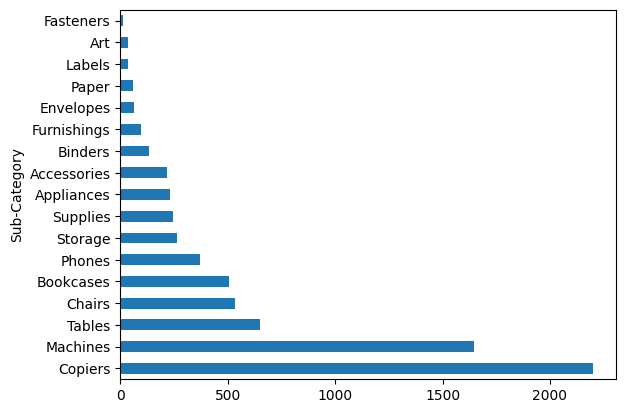

In [33]:
df.groupby("Sub-Category").Sales.agg("mean").sort_values(ascending=False).plot(kind="barh")

## Monthly Sales

In [37]:
df.groupby("Order Date").Sales.agg("sum")

Order Date
1/01/2017    1481.8280
1/02/2014     468.9000
1/02/2016     161.9700
1/03/2014    2203.1510
1/03/2015    1642.1744
               ...    
9/11/2017    4751.4920
9/12/2014    1522.6520
9/12/2015      34.0200
9/12/2016    1855.4830
9/12/2017    5470.3900
Name: Sales, Length: 1237, dtype: float64

In [38]:
#Change the column to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

<Axes: xlabel='Order Date'>

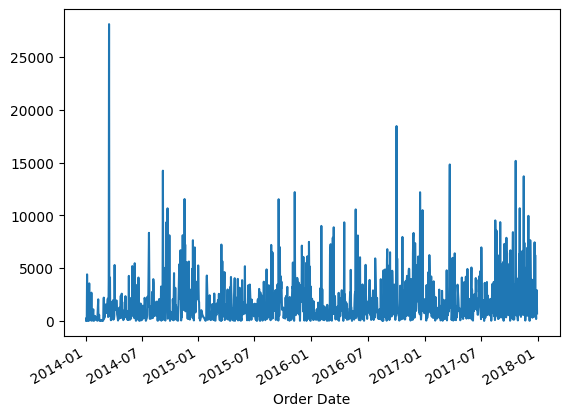

In [39]:
df.groupby('Order Date').Sales.agg('sum').sort_index().plot()

<Axes: xlabel='Order Date'>

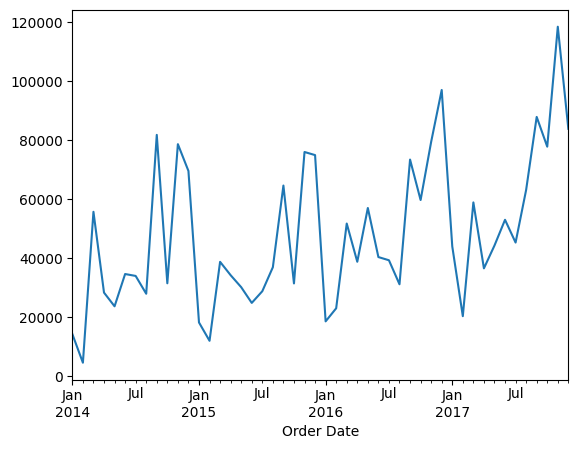

In [40]:
df.groupby(pd.Grouper(key='Order Date', freq='M')).Sales.agg('sum').sort_index().plot()

## How many sub-categories in each category?

In [44]:
df.groupby('Category')['Sub-Category'].nunique().sort_values(ascending=False)

Category
Office Supplies    9
Furniture          4
Technology         4
Name: Sub-Category, dtype: int64

## Who (Customer) is the best customer? (from sales)


In [45]:
# Group by Customer Name and sum their sales
customer_sales = df.groupby('Customer Name')['Sales'].sum()

# Sort customers by total sales in descending order
customer_sales = customer_sales.sort_values(ascending=False)

# The first entry in 'customer_sales' will be the best customer
best_customer = customer_sales.index[0]
best_customer_total_sales = customer_sales.iloc[0]

print(f"The best customer is '{best_customer}' with total sales of ${best_customer_total_sales:.2f}")


The best customer is 'Sean Miller' with total sales of $25043.05


## Which Sub-Category makes the most profit?

In [46]:
# Group by Sub-Category and sum their profits
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum()

# Find the sub-category with the highest total profit
most_profitable_sub_category = sub_category_profit.idxmax()
most_profitable_profit = sub_category_profit.max()

print(f"The most profitable sub-category is '{most_profitable_sub_category}' with a total profit of ${most_profitable_profit:.2f}")


The most profitable sub-category is 'Copiers' with a total profit of $55617.82


## Which month has the most orders?

In [47]:
# Extract the month from the "Order Date" column and create a new column
df['Order Month'] = df['Order Date'].dt.month

# Group by month and count the number of orders in each month
monthly_orders = df.groupby('Order Month')['Order ID'].count()

# Find the month with the most orders
most_orders_month = monthly_orders.idxmax()
most_orders_count = monthly_orders.max()

print(f"The month with the most orders is {most_orders_month} with {most_orders_count} orders.")


The month with the most orders is 11 with 1471 orders.


## Which Product (name) has the highest price per unit?

In [48]:
# Calculate the price per unit for each product
df['Price Per Unit'] = df['Sales'] / df['Quantity']

# Find the product with the highest price per unit
highest_price_product = df.loc[df['Price Per Unit'].idxmax()]['Product Name']
highest_price_per_unit = df['Price Per Unit'].max()

print(f"The product with the highest price per unit is '{highest_price_product}' with a price per unit of ${highest_price_per_unit:.2f}")


The product with the highest price per unit is 'Cisco TelePresence System EX90 Videoconferencing Unit' with a price per unit of $3773.08
